In [1]:
from preamble import *
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

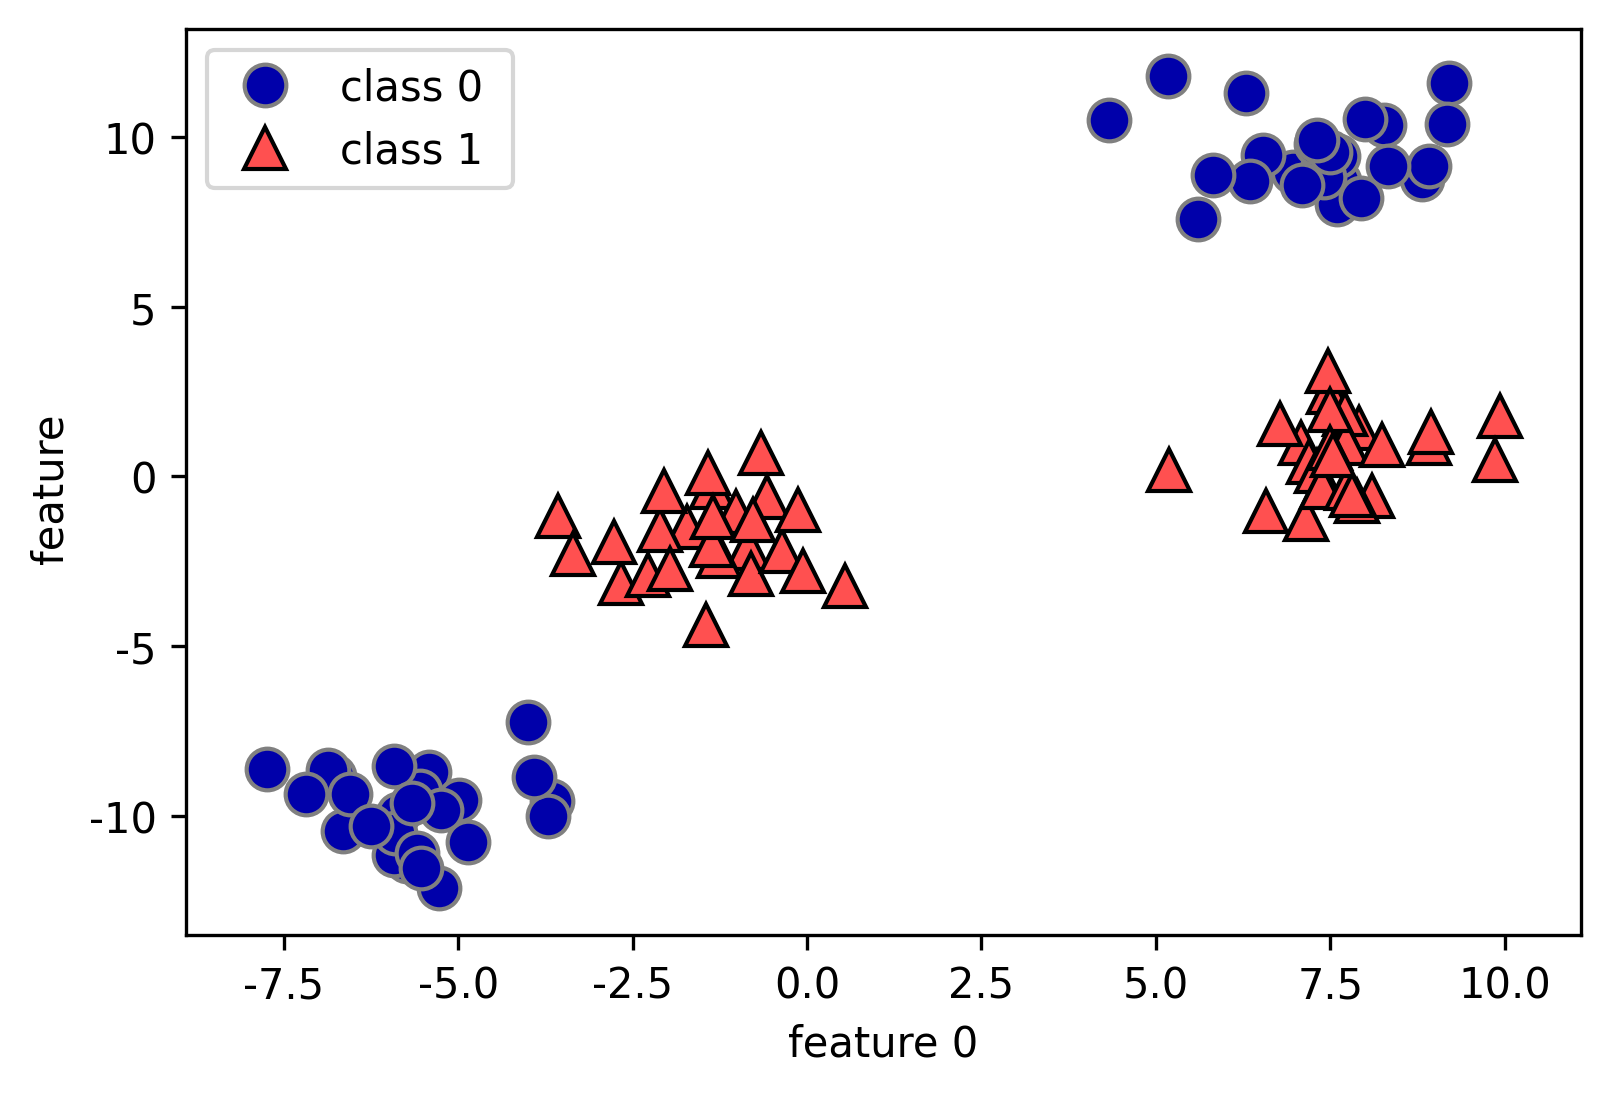

In [3]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y%2

mglearn.discrete_scatter(X[:, 0 ], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature ")
plt.legend(["class 0 ","class 1"])

/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'feature ')

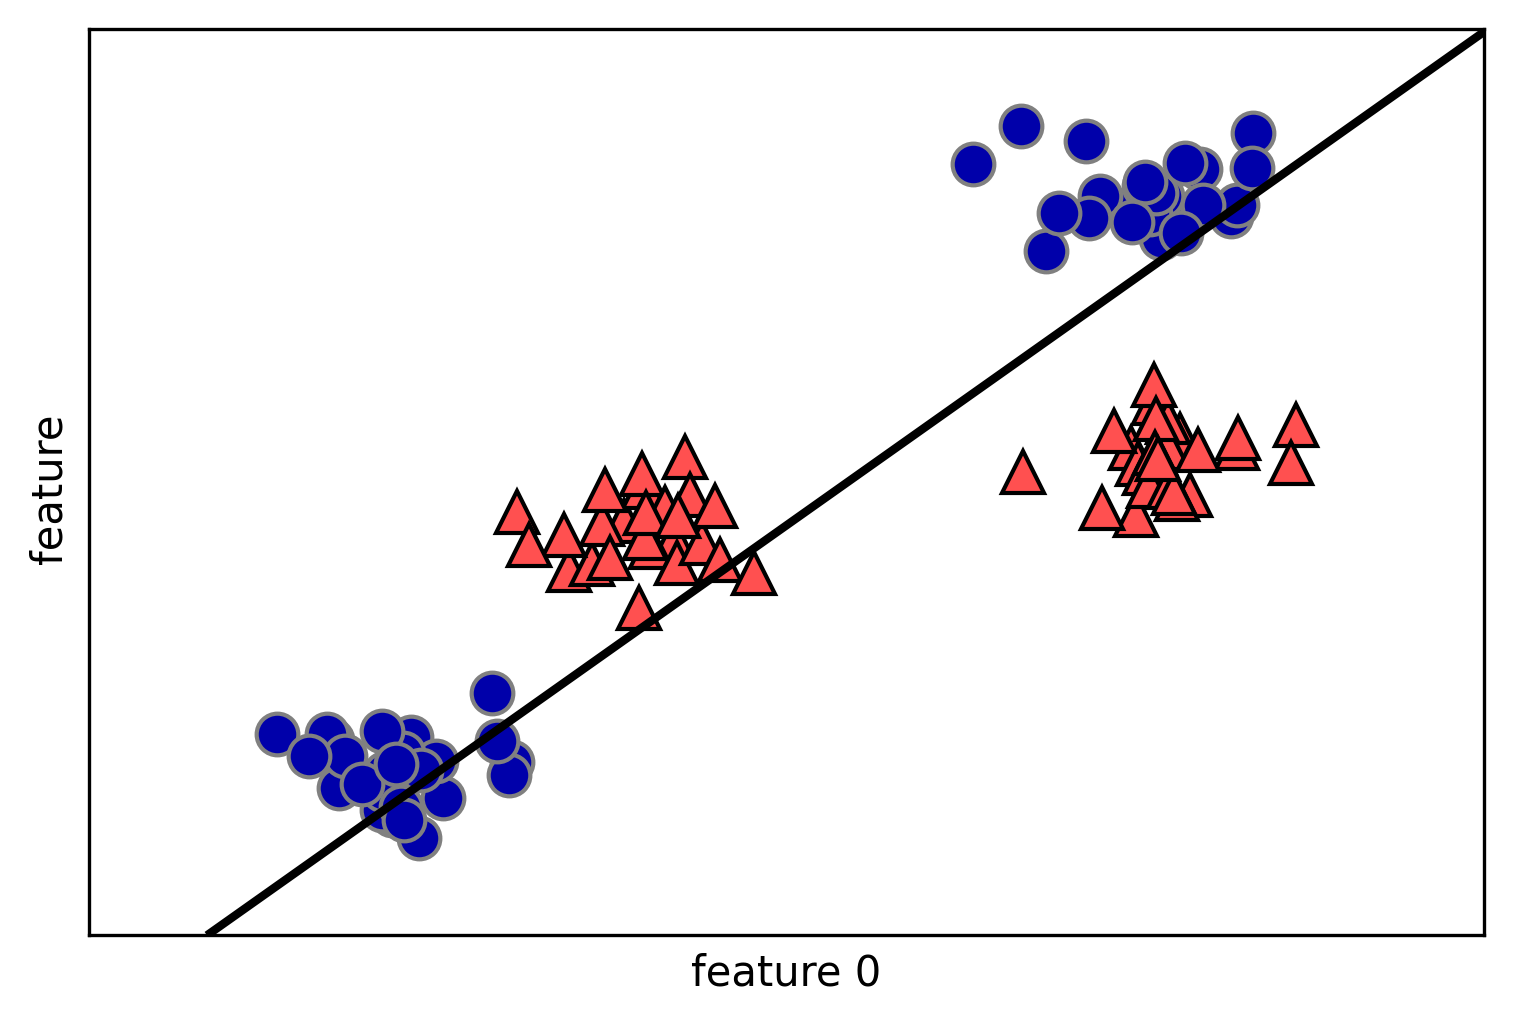

In [6]:
linear_svm = LinearSVC().fit(X ,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:, 0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature ")

<ipython-input-16-96029760e0e7>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev = -150, azim = -30)


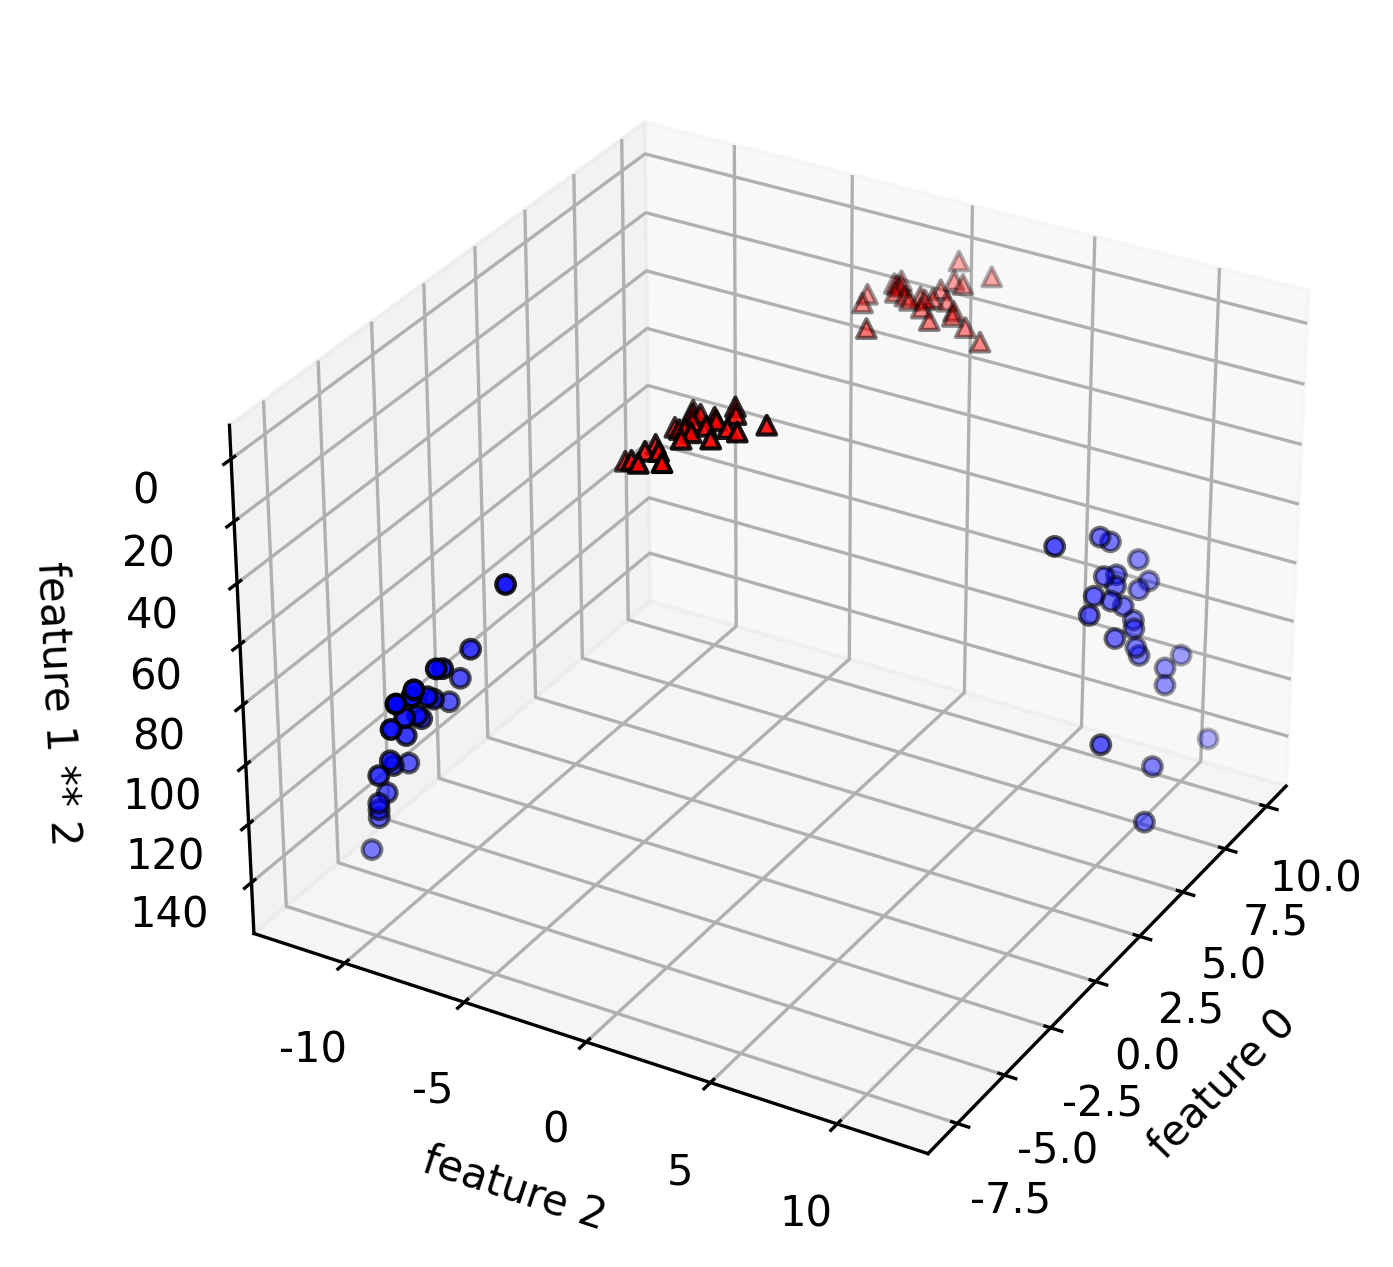

In [16]:
from mpl_toolkits.mplot3d import Axes3D , axes3d

#두 번쨰 특성을 제곱하여 추가합니다.
x_new = np.hstack([X,X[:, 1:] **2])
figure = plt.figure()

#3차원 그래프
ax = Axes3D(figure, elev = -150, azim = -30)

#y == 0 인 포인트를 먼저 그리고 그 다음 y==1인 포인트를 그립니다.
mask = y == 0 
ax.scatter(x_new[mask, 0],x_new[mask, 1],x_new[mask, 2], c = 'b',edgecolor = 'k') # y==0
ax.scatter(x_new[~mask, 0],x_new[~mask, 1],x_new[~mask, 2], c = 'r',marker = '^', edgecolor = 'k') # y==1
ax.set_xlabel("feature 0 ")
ax.set_ylabel("feature 2")
ax.set_zlabel("feature 1 ** 2 ")
plt.show()

/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-17-ec702a5dad64>:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev = -150, azim = -30)


Text(0.5, 0, 'feature 1 ** 2 ')

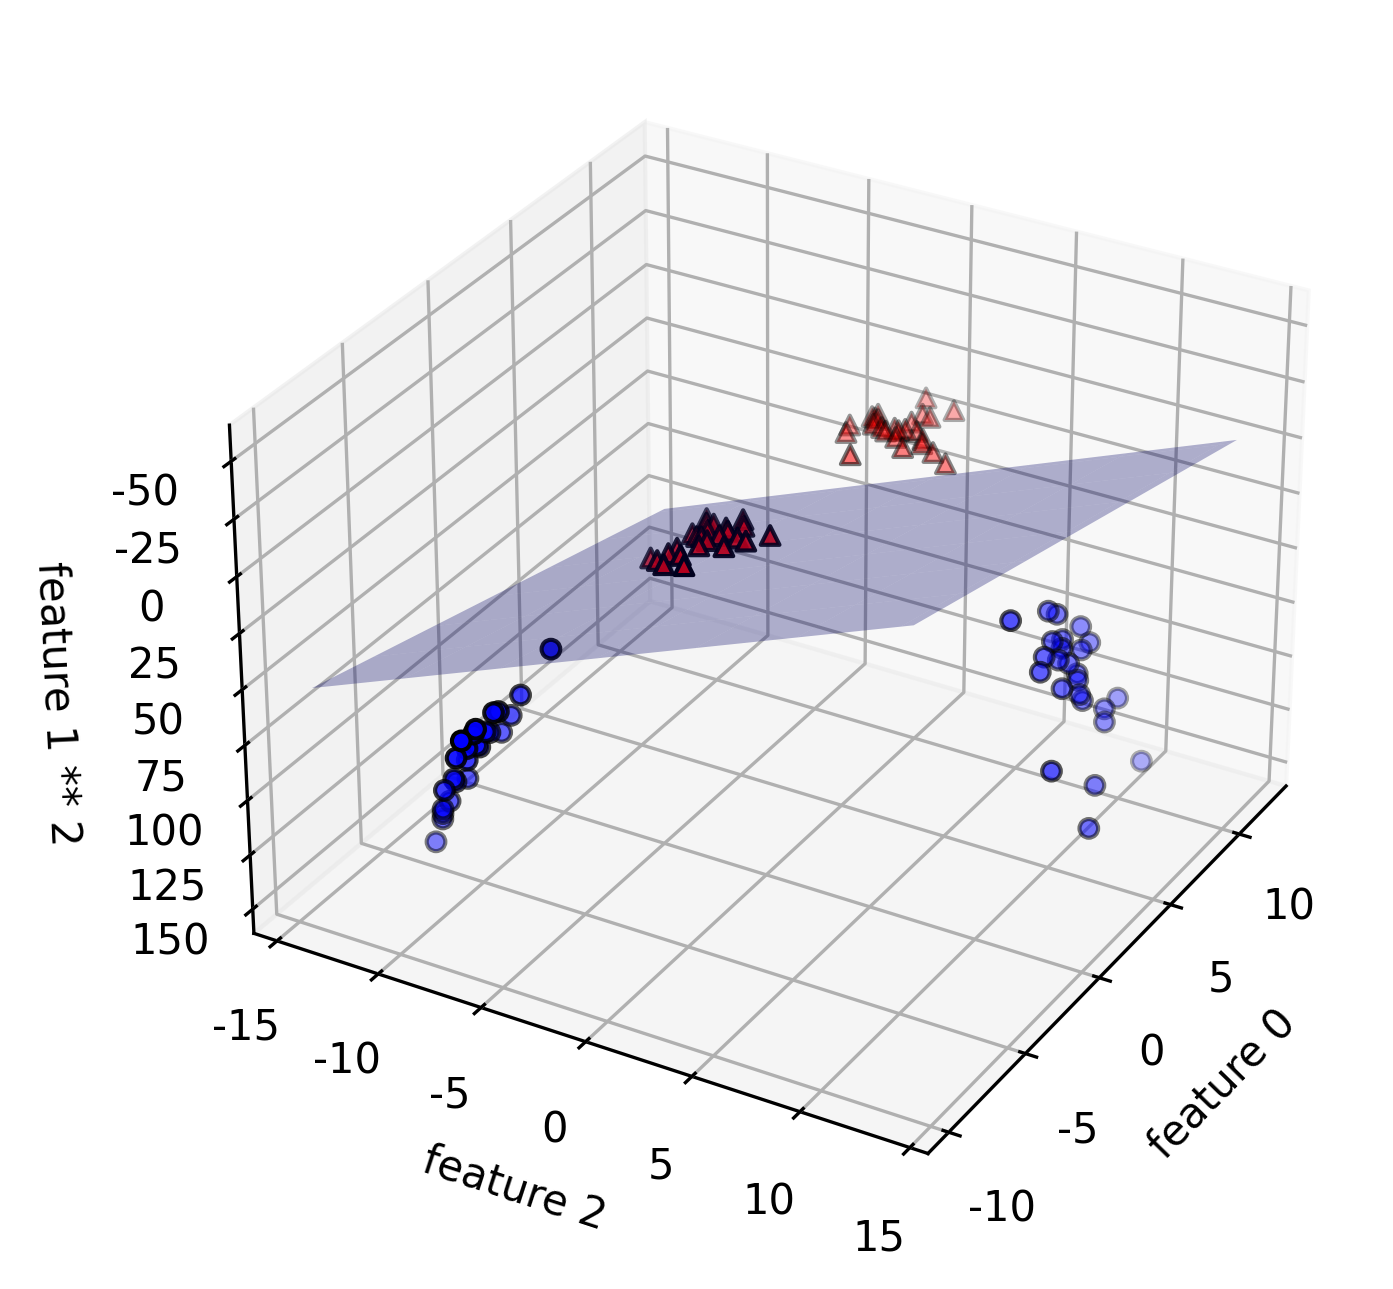

In [17]:
linear_svm_3d = LinearSVC().fit(x_new,y)
coef = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

#선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev = -150, azim = -30)
xx = np.linspace(x_new[:,0].min()-2,x_new[:,0].max()+2, 50)
yy = np.linspace(x_new[:,1].min()-2,x_new[:,1].max()+2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha=0.3)
ax.scatter(x_new[mask, 0],x_new[mask, 1],x_new[mask, 2], c = 'b',edgecolor = 'k')
ax.scatter(x_new[~mask, 0],x_new[~mask, 1],x_new[~mask, 2], c = 'r',marker = '^', edgecolor = 'k')
ax.set_xlabel("feature 0 ")
ax.set_ylabel("feature 2")
ax.set_zlabel("feature 1 ** 2 ")